#Dados desbalanceados

##Importar Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

##Preparação dos dados

In [2]:
base_census=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
np.unique(base_census['income'],return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

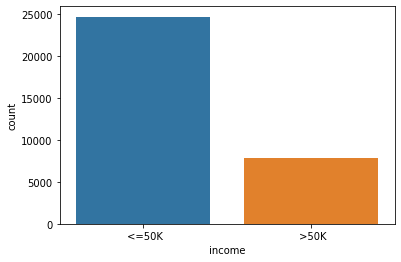

In [4]:
sns.countplot(x=base_census['income']);

In [5]:
X_census=base_census.iloc[:,0:14].values
y_census=base_census.iloc[:,14].values

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [7]:
X_census[:,1]=label_encoder.fit_transform(X_census[:,1])
X_census[:,3]=label_encoder.fit_transform(X_census[:,3])
X_census[:,5]=label_encoder.fit_transform(X_census[:,5])
X_census[:,6]=label_encoder.fit_transform(X_census[:,6])
X_census[:,7]=label_encoder.fit_transform(X_census[:,7])
X_census[:,8]=label_encoder.fit_transform(X_census[:,8])
X_census[:,9]=label_encoder.fit_transform(X_census[:,9])
X_census[:,13]=label_encoder.fit_transform(X_census[:,13])

In [8]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

##Subamostragem com Tomek Links

In [9]:
from imblearn.under_sampling import TomekLinks

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
tl=TomekLinks(sampling_strategy='all')
X_under,y_under=tl.fit_sample(X_census,y_census)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
X_under.shape, y_under.shape

((27759, 14), (27759,))

In [12]:
np.unique(y_census,return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [13]:
np.unique(y_under,return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440]))

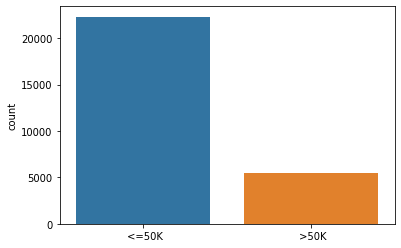

In [14]:
sns.countplot(x=y_under);

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

oneHotEncoder=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])],remainder='passthrough')
X_under=oneHotEncoder.fit_transform(X_under).toarray()

In [16]:
X_census.shape

(32561, 14)

In [17]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under,X_census_teste_under,y_census_treinamento_under,y_census_teste_under=train_test_split(X_under,y_under,test_size=0.15,random_state=0)

In [18]:
X_census_treinamento_under.shape, X_census_teste_under.shape, y_census_treinamento_under.shape, y_census_teste_under.shape

((23595, 108), (4164, 108), (23595,), (4164,))

In [19]:
#84.70% com dados não balanceados
from sklearn.ensemble import RandomForestClassifier
random_forest_census=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=100)
random_forest_census.fit(X_census_treinamento_under,y_census_treinamento_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score,classification_report
previsoes=random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under,previsoes)

0.8957732949087416

In [21]:
print(classification_report(y_census_teste_under,previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.94      3327
        >50K       0.81      0.63      0.71       837

    accuracy                           0.90      4164
   macro avg       0.86      0.80      0.82      4164
weighted avg       0.89      0.90      0.89      4164



##Sobreamostragem com SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote=SMOTE(sampling_strategy='minority')

In [24]:
X_over,y_over=smote.fit_sample(X_census,y_census)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
X_over.shape

(49440, 14)

In [26]:
np.unique(y_census,return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [27]:
np.unique(y_over,return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [28]:
#Comentado por atingir o limite de memória do Google Colab
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# oneHotEncoder=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])],remainder='passthrough')
# X_over=oneHotEncoder.fit_transform(X_over).toarray()
# X_over

In [29]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over,X_census_teste_over,y_census_treinamento_over,y_census_teste_over=train_test_split(X_over,y_over,test_size=0.15,random_state=0) 

In [30]:
#84.70% com dados não balanceados
from sklearn.ensemble import RandomForestClassifier
random_forest_census=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=100)
random_forest_census.fit(X_census_treinamento_over,y_census_treinamento_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import accuracy_score
previsoes=random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over,previsoes)

0.9093851132686084

In [32]:
print(classification_report(y_census_teste_over,previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

